# Python Choropleth

### 부제 : 파이썬에서 데이터프레임을 다루는 (색다른) 방법

### 이번 시간 강의 내용

1. 데이터 입출력 : **pandas** 라이브러리 (R의 데이터프레임을 Python으로 구현)
1. 데이터프레임 전처리 : **dfply** 라이브러리 (R의 **dplyr** 패키지를 Python으로 구현)
1. 데이터 시각화 : **plotnine** 라이브러리 (R의 **ggplot2** 패키지를 Python으로 구현)
1. 지도 시각화 : **geopandas** 라이브러리 & **folium** 라이브러리 (**leaflet.js**를 활용)

### 1. 데이터 입출력 : pandas 라이브러리 (R의 데이터프레임을 Python으로 구현)

#### pandas 라이브러리

* 데이터 분석 과정에서 2차원 데이터프레임이 주로 사용됩니다.
    - **pandas**의 데이터프레임은 R의 데이터프레임에서 유래한 것으로 알려져 있습니다


* **pandas** 라이브러리의 함수를 이용하면 다음과 같은 자료형을 생성할 수 있습니다.
    - 1차원 시리즈(Series) : 데이터프레임의 열벡터로 사용됩니다.
    - 2차원 데이터프레임(DataFrame) : 1차원 시리즈를 컬럼으로 갖는 2차원 자료형입니다.
    - 3차원 패널(Panel) : 데이터프레임을 (특히 시간에 따라) 중첩한 것입니다.
        * 동일한 관찰 대상이 시간의 흐름에 따라 어떻게 바뀌어 가는지 확인하는 분석이 가능합니다.

#### (1) 분석 데이터 읽기 : 온라인에 공개된 csv 파일

In [1]:
# 라이브러리를 호출합니다.
import pandas as pd
import requests
import chardet

In [2]:
# 아래 링크는 2019년 서울특별시 아파트 매매 실거래가를 웹 크롤링으로 수집하여 온라인으로 공개한 것입니다.
url = 'https://bit.ly/Apt_Price_2019_EUCKR'

In [3]:
# 데이터프레임으로 불러옵니다.
apt = pd.read_csv(filepath_or_buffer = url)

# 인코딩 방식이 'UTF-8'이 아니어서 제대로 불러올 수 없었습니다.

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 0: invalid start byte

In [4]:
# (인코딩 방식을 확인하기 위해) HTTP 요청을 실행합니다.
res = requests.get(url = url)

In [5]:
# HTTP 응답 헤더를 확인합니다.
res.headers

{'Connection': 'keep-alive', 'Content-Length': '1255805', 'Content-Type': 'text/plain; charset=utf-8', 'Cache-Control': 'max-age=300', 'Content-Security-Policy': "default-src 'none'; style-src 'unsafe-inline'; sandbox", 'ETag': 'W/"770de7d048b109f11c7cd932bf15377a6718ce07409d43a08eda6d35efddb313"', 'Strict-Transport-Security': 'max-age=31536000', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'deny', 'X-XSS-Protection': '1; mode=block', 'Via': '1.1 varnish (Varnish/6.0), 1.1 varnish', 'Content-Encoding': 'gzip', 'X-GitHub-Request-Id': '9222:4F39:C85D5:E1F7A:5F8184BF', 'Accept-Ranges': 'bytes', 'Date': 'Sat, 10 Oct 2020 10:24:15 GMT', 'X-Served-By': 'cache-hnd18722-HND', 'X-Cache': 'MISS, MISS', 'X-Cache-Hits': '0, 0', 'X-Timer': 'S1602325455.480357,VS0,VE294', 'Vary': 'Authorization,Accept-Encoding, Accept-Encoding', 'Access-Control-Allow-Origin': '*', 'X-Fastly-Request-ID': 'e9a29dfe3677bb541cc30e052799d2b84294da93', 'Expires': 'Sat, 10 Oct 2020 10:29:15 GMT', 'Source-Age': '

In [6]:
# 인코딩 방식만 확인합니다.
res.headers['Content-Type']

'text/plain; charset=utf-8'

In [7]:
# HTML을 'str' 자료형으로 출력합니다.
# 문자열의 크기('Content-Length')가 매우 크므로 일부만 확인합니다.
res.text[:100]

# 글자가 깨져서 보이는 걸로 보아 'UTF-8'이 아닌 것으로 판단됩니다.

'�ŷ��ݾ�,����\u2d75,��,���θ�,���θ��ǹ�����ȣ�ڵ�,���θ��ǹ��ι�ȣ�ڵ�,���θ��ñ����ڵ�,���θ��Ϸù�ȣ�ڵ�,���θ����������ڵ�,'

In [8]:
# HTML을 'bytes' 자료형으로 출력합니다.
res.content[:100]

b'\xb0\xc5\xb7\xa1\xb1\xdd\xbe\xd7,\xb0\xc7\xc3\xe0\xb3\xe2\xb5\xb5,\xb3\xe2,\xb5\xb5\xb7\xce\xb8\xed,\xb5\xb5\xb7\xce\xb8\xed\xb0\xc7\xb9\xb0\xba\xbb\xb9\xf8\xc8\xa3\xc4\xda\xb5\xe5,\xb5\xb5\xb7\xce\xb8\xed\xb0\xc7\xb9\xb0\xba\xce\xb9\xf8\xc8\xa3\xc4\xda\xb5\xe5,\xb5\xb5\xb7\xce\xb8\xed\xbd\xc3\xb1\xba\xb1\xb8\xc4\xda\xb5\xe5,\xb5\xb5\xb7\xce\xb8\xed\xc0\xcf\xb7\xc3\xb9\xf8\xc8'

In [9]:
# HTML 인코딩 방식을 확인합니다.
chardet.detect(byte_str = res.content[:100])

# 인코딩 방식이 'EUC-KR'입니다.

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}

In [10]:
# (인코딩 방식을 추가하여) HTML을 'bytes' 자료형으로 출력합니다.
res.content.decode(encoding = 'EUC-KR')[:100]

'거래금액,건축년도,년,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,도로명코드,법정동,법정동본번코드,법정동부번코드,법정동시군구코'

In [11]:
# 인코딩 방식을 추가하여 데이터프레임으로 불러옵니다.
apt = pd.read_csv(filepath_or_buffer = url, encoding = 'EUC-KR')

#### 데이터프레임의 구조 파악

In [12]:
# 처음 다섯 행만 출력합니다.
apt.head()

,거래금액,건축년도,년,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,도로명코드,...,아파트,월,일,일련번호,전용면적,지번,지역코드,층,시도명,시군구
0,"132,000",2005,2019,선릉로69길,20.0,0.0,11680.0,1,0.0,4166489.0,...,e-편한세상,1,3,11680-3622,59.606,755-4,11680,14,서울시,강남구
1,"61,000",2004,2019,테헤란로4길,32.0,0.0,11680.0,1,0.0,4166743.0,...,역삼동우정에쉐르1,1,5,11680-504,59.810,826-29,11680,8,서울시,강남구
2,"132,000",2005,2019,선릉로69길,20.0,0.0,11680.0,1,0.0,4166489.0,...,e-편한세상,1,11,11680-3622,59.606,755-4,11680,12,서울시,강남구
3,"19,500",2014,2019,테헤란로14길,13.0,0.0,11680.0,1,0.0,4166719.0,...,(735-15),1,16,11680-4317,15.250,735-15,11680,14,서울시,강남구
4,"130,000",2014,2019,테헤란로52길,16.0,0.0,11680.0,1,0.0,4166745.0,...,테헤란아이파크,1,23,11680-4296,84.641,709-5,11680,8,서울시,강남구


In [13]:
# 마지막 다섯 행만 출력합니다.
apt.tail()

,거래금액,건축년도,년,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,도로명코드,...,아파트,월,일,일련번호,전용면적,지번,지역코드,층,시도명,시군구
42193,"35,500",1993,2019,신내로,128.0,0.0,11260.0,2,0.0,3106007.0,...,동성1,10,16,11260-83,59.40,397,11260,1,서울시,중랑구
42194,"24,950",1996,2019,봉화산로,193.0,0.0,11260.0,3,0.0,3106003.0,...,신내11대명,10,17,11260-99,39.76,661,11260,15,서울시,중랑구
42195,"34,000",1996,2019,봉화산로,193.0,0.0,11260.0,0,0.0,3106003.0,...,신내11대명,10,17,11260-99,49.77,661,11260,10,서울시,중랑구
42196,"23,000",1996,2019,봉화산로,193.0,0.0,11260.0,3,0.0,3106003.0,...,신내11대명,10,21,11260-99,39.76,661,11260,1,서울시,중랑구
42197,"56,000",2013,2019,신내역로,165.0,0.0,11260.0,0,NaN,3106013.0,...,신내 데시앙포레,10,21,11260-2821,84.94,817,11260,1,서울시,중랑구


In [14]:
# 자료형을 확인합니다.
type(apt)

pandas.core.frame.DataFrame

In [15]:
# 행과 열의 차원을 확인합니다.
apt.shape

(42198, 26)

In [16]:
# 인덱스(행이름)를 출력합니다.
apt.index

RangeIndex(start=0, stop=42198, step=1)

In [17]:
# [참고] 데이터프레임 자료형은 인덱스를 1부터 시작하도록 변경할 수 있습니다.
# nrow = len(apt)
# apt.index = range(1, nrow+1)
# apt.index

In [18]:
# 컬럼명(열이름)을 출력합니다.
apt.columns

Index(['거래금액', '건축년도', '년', '도로명', '도로명건물본번호코드', '도로명건물부번호코드', '도로명시군구코드',
       '도로명일련번호코드', '도로명지상지하코드', '도로명코드', '법정동', '법정동본번코드', '법정동부번코드',
       '법정동시군구코드', '법정동읍면동코드', '법정동지번코드', '아파트', '월', '일', '일련번호', '전용면적',
       '지번', '지역코드', '층', '시도명', '시군구'],
      dtype='object')

In [19]:
# 데이터프레임의 정보를 한 번에 확인합니다.
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42198 entries, 0 to 42197
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   거래금액        42198 non-null  object 
 1   건축년도        42198 non-null  int64  
 2   년           42198 non-null  int64  
 3   도로명         42165 non-null  object 
 4   도로명건물본번호코드  42181 non-null  float64
 5   도로명건물부번호코드  42181 non-null  float64
 6   도로명시군구코드    42181 non-null  float64
 7   도로명일련번호코드   42198 non-null  int64  
 8   도로명지상지하코드   40160 non-null  float64
 9   도로명코드       42181 non-null  float64
 10  법정동         42198 non-null  object 
 11  법정동본번코드     42198 non-null  int64  
 12  법정동부번코드     42198 non-null  int64  
 13  법정동시군구코드    42198 non-null  int64  
 14  법정동읍면동코드    42198 non-null  int64  
 15  법정동지번코드     42198 non-null  int64  
 16  아파트         42198 non-null  object 
 17  월           42198 non-null  int64  
 18  일           42198 non-null  int64  
 19  일련번호        40773 non-nul

#### 데이터프레임 전처리해야 할 내용

* `월`, `거래금액`, `전용면적`, `아파트`, `시군구`, `법정동` 등 필요한 컬럼만 남깁니다.
    * 시군구 및 법정동 기준으로 단계구분도를 그릴 예정입니다.
    
    
* `월` 컬럼은 두 자리 문자열로 변경합니다. (zfill() 함수 사용)
    * `월` 컬럼은 탐색적 데이터 분석(EDA)의 일환으로 가볍게 살펴보겠습니다.
    
    
* `거래금액` 컬럼은 문자열이므로 정수형으로 변경해야 하는데 먼저 콤마(,)를 제거해야 합니다.
    * 단위를 '만원'에서 '억원'으로 변경합니다.

### 2. 데이터프레임 전처리 : dfply 라이브러리 (R의 dplyr 패키지를 Python으로 구현)

#### dfply 라이브러리

* **dfply**는 R의 **dplyr** 패키지를 Python으로 구현한 라이브러리입니다.


* **dfply** 라이브러리는 데이터프레임을 전처리하는데 필요한 함수를 포함하고 있습니다.
    - 파이프 연산자('>>')를 지원하기 때문에 코드를 쉽게 작성할 수 있습니다.


* **dfply** 라이브러리로 처리할 수 있는 주요 작업은 다음과 같습니다. (SQL 대체)
    - 데이터프레임에서 컬럼을 **선택(select)**하거나 **제거(drop)**합니다.
    - 조건에 맞는 행을 **필터링(filter_by)**하거나, 인덱스로 **잘라(row_slice)**냅니다.
    - **그룹을 설정(group_by)**하고 숫자 변수를 **집계(summarize)한 변수를 생성**합니다.
    - 기존 변수를 **변형한(mutate) 다양한 파생변수를 생성**합니다.
    - 데이터프레임을 오름차순 또는 내림차순으로 **정렬(arrange)**합니다.

#### dfply 라이브러리를 설치합니다.

* 주피터 노트북에서 라이브러리를 설치할 때 `느낌표(!)`를 맨 앞에 추가하면 됩니다.

> `!pip install dfply`
> 
> dfply-0.3.3이 설치되었습니다.

In [20]:
# 라이브러리를 호출합니다.
from dfply import *

In [21]:
# 필요한 컬럼만 남깁니다.
apt >>= select(X.월, X.아파트, X.거래금액, X.전용면적, X.층, X.시도명, X.시군구, X.법정동)
apt.head()

,월,아파트,거래금액,전용면적,층,시도명,시군구,법정동
0,1,e-편한세상,"132,000",59.606,14,서울시,강남구,역삼동
1,1,역삼동우정에쉐르1,"61,000",59.810,8,서울시,강남구,역삼동
2,1,e-편한세상,"132,000",59.606,12,서울시,강남구,역삼동
3,1,(735-15),"19,500",15.250,14,서울시,강남구,역삼동
4,1,테헤란아이파크,"130,000",84.641,8,서울시,강남구,역삼동


In [22]:
# `월` 컬럼을 문자열로 변경합니다.
apt >>= mutate(월 = X.월.astype(str))
apt.head()

,월,아파트,거래금액,전용면적,층,시도명,시군구,법정동
0,1,e-편한세상,"132,000",59.606,14,서울시,강남구,역삼동
1,1,역삼동우정에쉐르1,"61,000",59.810,8,서울시,강남구,역삼동
2,1,e-편한세상,"132,000",59.606,12,서울시,강남구,역삼동
3,1,(735-15),"19,500",15.250,14,서울시,강남구,역삼동
4,1,테헤란아이파크,"130,000",84.641,8,서울시,강남구,역삼동


In [23]:
# `월` 컬럼을 두 자리 문자열로 변경합니다.
apt >>= mutate(월 = X.월.str.zfill(2))
apt.head()

,월,아파트,거래금액,전용면적,층,시도명,시군구,법정동
0,01,e-편한세상,"132,000",59.606,14,서울시,강남구,역삼동
1,01,역삼동우정에쉐르1,"61,000",59.810,8,서울시,강남구,역삼동
2,01,e-편한세상,"132,000",59.606,12,서울시,강남구,역삼동
3,01,(735-15),"19,500",15.250,14,서울시,강남구,역삼동
4,01,테헤란아이파크,"130,000",84.641,8,서울시,강남구,역삼동


In [24]:
# `거래금액` 컬럼에서 콤마(,)를 제거합니다.
apt >>= mutate(거래금액 = X.거래금액.str.replace(',', ''))
apt.head()

,월,아파트,거래금액,전용면적,층,시도명,시군구,법정동
0,01,e-편한세상,132000,59.606,14,서울시,강남구,역삼동
1,01,역삼동우정에쉐르1,61000,59.810,8,서울시,강남구,역삼동
2,01,e-편한세상,132000,59.606,12,서울시,강남구,역삼동
3,01,(735-15),19500,15.250,14,서울시,강남구,역삼동
4,01,테헤란아이파크,130000,84.641,8,서울시,강남구,역삼동


In [25]:
# `거래금액` 컬럼을 정수형으로 변경합니다.
apt >>= mutate(거래금액 = X.거래금액.astype(int))
apt.head()

,월,아파트,거래금액,전용면적,층,시도명,시군구,법정동
0,01,e-편한세상,132000,59.606,14,서울시,강남구,역삼동
1,01,역삼동우정에쉐르1,61000,59.810,8,서울시,강남구,역삼동
2,01,e-편한세상,132000,59.606,12,서울시,강남구,역삼동
3,01,(735-15),19500,15.250,14,서울시,강남구,역삼동
4,01,테헤란아이파크,130000,84.641,8,서울시,강남구,역삼동


In [26]:
# `거래금액` 컬럼의 단위를 '만원'에서 '억원'으로 변경합니다.
apt >>= mutate(거래금액 = X.거래금액 / 10000)
apt.head()

,월,아파트,거래금액,전용면적,층,시도명,시군구,법정동
0,01,e-편한세상,13.20,59.606,14,서울시,강남구,역삼동
1,01,역삼동우정에쉐르1,6.10,59.810,8,서울시,강남구,역삼동
2,01,e-편한세상,13.20,59.606,12,서울시,강남구,역삼동
3,01,(735-15),1.95,15.250,14,서울시,강남구,역삼동
4,01,테헤란아이파크,13.00,84.641,8,서울시,강남구,역삼동


In [27]:
# 컬럼별로 NA 개수를 확인합니다.
apt.isna().sum()

월       0
아파트     0
거래금액    0
전용면적    0
층       0
시도명     0
시군구     0
법정동     0
dtype: int64

In [28]:
# `월` 컬럼의 빈도수를 확인합니다.
# R에서는 summarise(), summarize() 둘 다 가능하지만 Python에서는 summarize() 함수만 가능합니다.
apt \
  >> group_by(X.월) \
  >> summarize(Freq = n(X.월)) \
  >> ungroup() \
  >> arrange(X.Freq, ascending = False)

,월,Freq
6,07,8822
5,06,6914
7,08,6601
8,09,4908
4,05,4393
3,04,3038
2,03,2275
9,10,2075
0,01,1718
1,02,1454


In [29]:
# `시군구` 컬럼의 빈도수를 확인합니다.
apt \
  >> group_by(X.시군구) \
  >> summarize(Freq = n(X.시군구)) \
  >> ungroup() \
  >> arrange(X.Freq, ascending = False)

,시군구,Freq
8,노원구,4045
17,송파구,3346
0,강남구,2863
1,강동구,2223
18,양천구,2150
16,성북구,2060
6,구로구,2009
3,강서구,1961
14,서초구,1882
19,영등포구,1832


In [30]:
# 일부 숫자형 컬럼에 대한 기술통계량을 확인합니다.
apt[['거래금액', '전용면적', '층']].describe()

# 데이터프레임에 대해 describe() 메서드를 적용하면 숫자형 컬럼에 대한 기술통계량을 일괄 출력합니다.

,거래금액,전용면적,층
count,42198.000000,42198.000000,42198.000000
mean,8.017049,77.546594,9.373549
std,5.833027,31.270181,6.252393
min,0.540000,10.780000,-2.000000
25%,4.250000,59.670000,5.000000
50%,6.400000,82.450000,8.000000
75%,9.700000,84.970000,13.000000
max,84.000000,272.740000,67.000000


In [31]:
# 소수점 2자리까지 표기하는 방식으로 변경합니다.
pd.options.display.float_format = '{:.2f}'.format

# 일부 숫자형 컬럼에 대한 기술통계량을 다시 확인합니다.
apt[['거래금액', '전용면적', '층']].describe()

,거래금액,전용면적,층
count,42198.00,42198.00,42198.00
mean,8.02,77.55,9.37
std,5.83,31.27,6.25
min,0.54,10.78,-2.00
25%,4.25,59.67,5.00
50%,6.40,82.45,8.00
75%,9.70,84.97,13.00
max,84.00,272.74,67.00


### 3. 데이터 시각화 : plotnine 라이브러리 (R의 ggplot2 패키지를 Python으로 구현)

#### plotnine 라이브러리

* **plotnine**은 R의 **ggplot2** 패키지를 Python으로 구현한 라이브러리입니다.
    - **ggplot2**은 R에서 데이터 시각화 관련 패키지 중 전 세계적으로 가장 많이 쓰이는 패키지 중 하나입니다.


* **plotnine** 라이브러리는 몇 개의 층(layer)를 쌓는 증분 방식을 사용하여 사용자가 원하는 그래프를 완성할 수 있도록 합니다.
    - `ggplot()` 함수와 `geom_*()` 함수로 그래프의 기본 골격을 만듭니다.
    - `coord_*()`, `scale_*()`, `facet_*()` 함수 등으로 레이어를 추가, 그래프를 통해 전달하려는 메시지를 효과적으로 표현할 수 있습니다.
    - 각 레이어는 '+' 기호로 추가합니다.

#### plotnine 라이브러리를 설치합니다.

> `!pip install plotnine`
> 
> descartes-1.1.0, mizani-0.7.1, palettable-3.3.0, pandas-1.1.2, plotnine-0.7.1이 함께 설치되었습니다.

#### Jupyter Notebook에서 라이브러리가 제대로 설치되지 않을 때 체크사항

* 에러 메시지 하단에 **아직 설치되지 않은 라이브러리 때문**이라고 하면 해당 라이브러리를 먼저 설치합니다.
* 만약 위 방법으로 해결되지 않으면 (Python 버전 문제일 수 있으므로) 아나콘다를 재설치하고 다시 시도합니다.
* 마지막으로, 아래 링크를 참조하여 터미널에서 직접 라이브러리를 설치합니다.
    - [관련 블로그](https://new93helloworld.tistory.com/328)

#### plotnine 라이브러리로 막대그래프 그리기

In [32]:
# 라이브러리를 호출합니다.
from plotnine import *
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

%matplotlib inline

In [33]:
# '경고'를 출력하지 않도록 설정합니다. (하지만 가능하면 경고를 확인하시는 것이 좋습니다.)
import warnings
warnings.filterwarnings('ignore')

#### 한글 폰트 설정 방법

* [구글 폰트](https://fonts.google.com/?subset=korean)에서 원하는 한글 폰트를 찾습니다.

* 이번 예제를 위해 **'Nanum Gothic'** 폰트를 내려 받겠습니다.

* 로컬 컴퓨터에서 **ttf** 파일을 설치한 다음, 저장된 경로를 찾아 등록합니다.

In [34]:
# 현재 사용 중인 컴퓨터에 설치된 ttf(TrueType Font) 파일의 개수를 출력합니다.
fontList = fm.findSystemFonts(fontext = 'ttf')
len(fontList)

332

In [35]:
# 폰트 목록이 너무 많으니, 관심 있는 폰트가 있는지 여부를 빠르게 확인합니다.
[font for font in fontList if 'Nanum' in font]

['/Library/Fonts/NanumGothic-Regular.ttf',
 '/Library/Fonts/NanumGothic-ExtraBold.ttf',
 '/Library/Fonts/NanumGothic-Bold.ttf']

In [36]:
# 전역 폰트 대신 한글 Font Properties를 설정합니다.
fontPath = '/Library/Fonts/NanumGothic-Regular.ttf'
fontProp = fm.FontProperties(fname = fontPath)

In [37]:
# `시군구` 기준으로 거래금액 평균을 `평균금액` 컬럼으로 생성합니다.
avgSigg = apt \
  >> group_by(X.시군구) \
  >> summarize(평균금액 = X.거래금액.mean()) \
  >> mutate(평균금액 = X.평균금액.round(2))

# 데이터프레임을 생성합니다.
avgSigg

,시군구,평균금액
0,강남구,17.63
1,강동구,7.29
2,강북구,4.47
3,강서구,5.66
4,관악구,5.05
5,광진구,8.81
6,구로구,4.77
7,금천구,4.13
8,노원구,4.27
9,도봉구,3.82


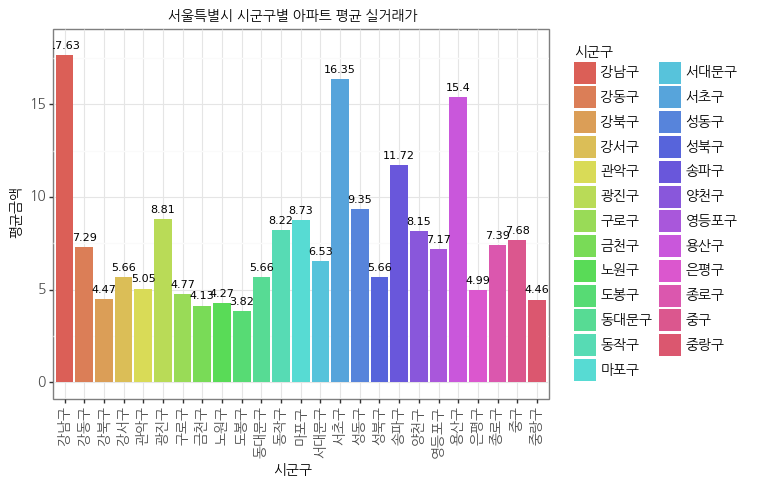

<ggplot: (8774813384638)>

In [38]:
# plotnine 라이브러리로 막대그래프를 그립니다.
title = '서울특별시 시군구별 아파트 평균 실거래가'
ggplot(data = avgSigg, 
       mapping = aes(x = '시군구', 
                     y = '평균금액',
                     fill = '시군구')) \
  + geom_col() \
  + geom_text(mapping = aes(label = '평균금액'),
              nudge_y = +0.5,
              size = 8) \
  + ggtitle(title = title) \
  + theme_bw() \
  + theme(text = element_text(fontproperties = fontProp, size = 6),
          axis_text_x = element_text(rotation = 90))

#### matplotlib 라이브러리로 막대그래프 그리기

In [39]:
# 설정 가능한 컬러맵(colormap) 목록을 확인합니다.
# 매우 많으므로 처음 10개만 출력합니다.
dir(plt.cm)[:10]

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r']

In [40]:
# 막대그래프를 그릴 X축(서울특별시 시군구)의 개수를 설정합니다.
n = len(avgSigg['시군구'])

# 컬러맵을 설정합니다.
colors = plt.cm.rainbow(X = np.linspace(start = 1, stop = 0, num = n))

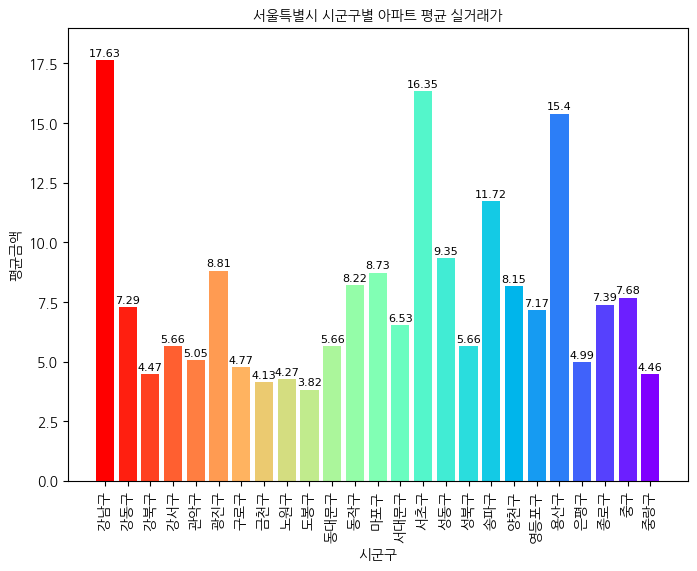

In [41]:
# 막대그래프를 그립니다. (plt.cm의 컬러맵 활용)
plt.figure(figsize = (8, 6), dpi = 100)

plt.bar(x = avgSigg['시군구'], height = avgSigg['평균금액'], color = colors)

plt.title(label = title, fontproperties = fontProp)
plt.xlabel(xlabel = '시군구', fontproperties = fontProp)
plt.xticks(rotation = 90, fontproperties = fontProp)
plt.ylabel(ylabel = '평균금액', fontproperties = fontProp)
plt.yticks(fontproperties = fontProp)

plt.ylim(0, 19)
for x, y in zip(avgSigg['시군구'], avgSigg['평균금액']):
    plt.text(x = x, y = y+0.5, s = y, fontsize = 8, ha = 'center', va = 'top', color = 'black')

plt.show()

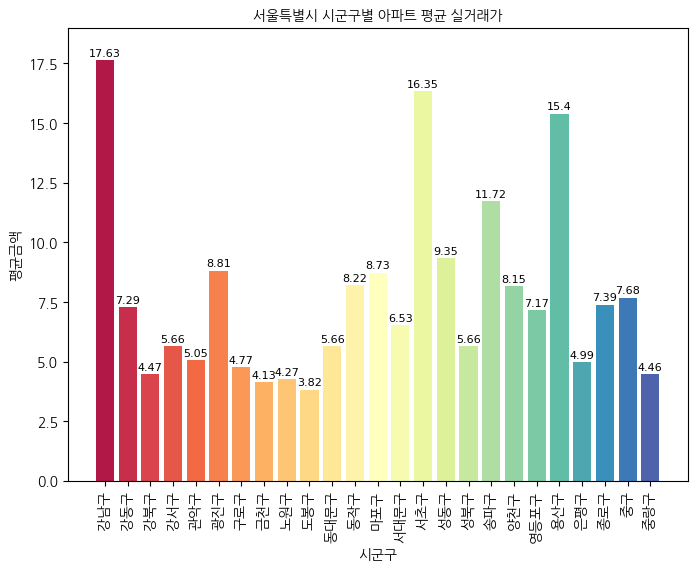

In [42]:
# 막대그래프를 그립니다. (seaborn 라이브러리의 color_palette() 함수 활용)
plt.figure(figsize = (8, 6), dpi = 100)

plt.bar(x = avgSigg['시군구'], height = avgSigg['평균금액'], 
        color = sns.color_palette(palette = 'Spectral', n_colors = n))

plt.title(label = title, fontproperties = fontProp)
plt.xlabel(xlabel = '시군구', fontproperties = fontProp)
plt.xticks(rotation = 90, fontproperties = fontProp)
plt.ylabel(ylabel = '평균금액', fontproperties = fontProp)
plt.yticks(fontproperties = fontProp)

plt.ylim(0, 19)
for x, y in zip(avgSigg['시군구'], avgSigg['평균금액']):
    plt.text(x = x, y = y+0.5, s = y, fontsize = 8, ha = 'center', va = 'top', color = 'black')

plt.show()

### 4. 지도 시각화 : geopandas 라이브러리 & folium 라이브러리 (**leaflet.js**를 활용)

* 지도 시각화 : **단계구분도(choropleth)**

    - 특정한 지리 현상(예를 들어, 인구 변동 등)을 선택적으로 표현한 것을 '주제도'라고 합니다. 
    - 주제도를 표현할 때, 지도를 행정구역으로 나누고 색상의 음영을 다르게 한 것으로 '단계구분도'라고 합니다.
    - 단계구분도를 표현할 때, 행정구역을 나누기 위해 `shape 파일`이 필요합니다.


* **shape 파일**이란?

    - 확장자가 `.shp`인 파일로, 행정구역의 경계 좌표를 포함하고 있습니다.
    - `.shp` 외에 `.shx`, `.dbf`, `.prj` 등이 함께 포함되어 있어야 제대로 읽을 수 있습니다.
        - Python에서 **geopandas** 라이브러리를 이용하면 `.shp` 파일을 쉽게 읽을 수 있습니다.


* **shape 파일**을 제공하는 사이트 소개
    - [통계청지리정보서비스](https://sgis.kostat.go.kr/view/index)에서 매년 행정동의 행정경계 데이터를 제공하고 있습니다. (회원가입 및 로그인 필수!)
    - [국가공간정보포털](http://www.nsdi.go.kr/)에서는 법정동의 행정경계 데이터를 제공하고 있습니다. (회원가입 및 로그인 필수!)
    - [공간정보시스템](http://www.gisdeveloper.co.kr/?p=2332)에서도 법정동의 행정경계 데이터를 제공하고 있습니다. (회원가입 필요 없는 가장 간단한 방법!)
        - 최신 '시군구' 행정경계 데이터를 깃허브로 공유합니다.

#### geopandas 라이브러리 소개

* Python에서 행정경계 데이터(shp 파일)을 읽을 때 주로 사용되는 라이브러리입니다.


* pandas 라이브러리의 데이터프레임과 유사합니다.
    - GeoDataFrame 및 GeoJSON 자료형을 다룰 수 있습니다.


* **Geometry** 자료형을 지원하므로, 여러 좌표를 하나로 묶은 **다각형(Polygon)** 처리가 쉽습니다.

#### geopandas 라이브러리를 설치합니다.

> `!pip install geopandas`
> 
> click-plugins-1.1.1, cligj-0.5.0, fiona-1.8.17, geopandas-0.8.1, munch-2.5.0, pyproj-2.6.1.post1, shapely-1.7.1이 함께 설치되었습니다.

In [43]:
# 라이브러리를 호출합니다.
import os
import geopandas as gpd

#### 시군구 단위 행정경계 데이터 읽기

In [44]:
# 현재 작업경로를 확인합니다.
os.getcwd()

'/Users/drkevin/Documents/Py_Viz/jupyter'

In [45]:
# 행정경계 데이터가 저장되어 있는 'bnd' 폴더로 작업경로를 변경합니다.
os.chdir(path = '../bnd')

In [46]:
# 작업경로에 포함된 폴더명과 파일명을 출력합니다.
os.listdir()

['.DS_Store', 'SIG_202005']

In [47]:
# shp 파일이 저장된 시군구 폴더로 작업경로를 변경합니다.
os.chdir(path = './SIG_202005')

In [48]:
# 작업경로에 포함된 폴더명과 파일명을 출력합니다.
os.listdir()

['SIG.prj', 'SIG.dbf', 'SIG.shp', 'SIG.shx']

In [49]:
# shp 파일을 GeoDataFrame으로 읽습니다.
shpSigg = gpd.read_file(filename = 'SIG.shp', encoding = 'EUC-KR')

In [50]:
# GeoDataFrame의 정보를 확인합니다.
shpSigg.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SIG_CD      250 non-null    object  
 1   SIG_ENG_NM  250 non-null    object  
 2   SIG_KOR_NM  250 non-null    object  
 3   geometry    250 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 7.9+ KB


In [51]:
# 처음 다섯 행만 출력합니다.
shpSigg.head()

# 마지막에 `geometry` 컬럼이 있으며, 다각형(POLYGON)으로 설정되어 있음을 확인할 수 있습니다.

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."


In [52]:
# 서울특별시만 남깁니다.
shpSigg >>= filter_by(X.SIG_CD.str[:2] == '11')

In [53]:
# 행과 열의 차원을 확인합니다.
shpSigg.shape

(25, 4)

#### 다양한 좌표계 (위도와 경도)

* **WGS84** : GPS가 사용하는 좌표계 (EPSG: 4326)
* **UTM-K(Bessel)** : 새주소지도에서 사용 중인 좌표계 (EPSG: 5178)
* **UTM-K(GRS80)** : 네이버 지도에서 사용 중인 좌표계 (EPSG: 5179)


* 출처 : https://www.osgeo.kr/17

In [55]:
# 좌표계를 확인합니다.
shpSigg.crs

<Projected CRS: PROJCS["PCS_ITRF2000_TM",GEOGCS["GCS_ITRF_2000",DA ...>
Name: PCS_ITRF2000_TM
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: International Terrestrial Reference Frame 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [56]:
# 만약 위 코드 실행 결과 아무런 내용도 출력되지 않으면 좌표계를 지정해야 합니다.
# shpSigg.crs = 'EPSG:5179'

In [57]:
# folium 라이브러리 활용을 위해 좌표계를 변환합니다. (EPSG:4326 -> WGS84와 같음)
shpSigg = shpSigg.to_crs(epsg = 4326)

In [58]:
# 처음 다섯 행만 출력합니다.
shpSigg.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((127.00864 37.58047, 127.00871 37.580..."
1,11140,Jung-gu,중구,"POLYGON ((127.02314 37.57196, 127.02336 37.571..."
2,11170,Yongsan-gu,용산구,"POLYGON ((126.96918 37.55566, 126.96917 37.554..."
3,11200,Seongdong-gu,성동구,"POLYGON ((127.04341 37.57234, 127.04524 37.571..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((127.10166 37.57240, 127.10224 37.572..."


In [59]:
# `shpSigg`에 `avgSigg`을 병합합니다.
shpSigg = pd.merge(left = shpSigg, 
                   right = avgSigg, 
                   how = 'left', 
                   left_on = 'SIG_KOR_NM', 
                   right_on = '시군구')

In [60]:
# 지도 위 단계구분도에 마우스 올리면 출력할 정보를 새로운 컬럼으로 미리 생성합니다.
shpSigg >>= mutate(HOVER = X.시군구 + ' : ' + X.평균금액.astype(str))

In [61]:
# 처음 다섯 행만 출력합니다.
shpSigg.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,시군구,평균금액,HOVER
0,11110,Jongno-gu,종로구,"POLYGON ((127.00864 37.58047, 127.00871 37.580...",종로구,7.39,종로구 : 7.39
1,11140,Jung-gu,중구,"POLYGON ((127.02314 37.57196, 127.02336 37.571...",중구,7.68,중구 : 7.68
2,11170,Yongsan-gu,용산구,"POLYGON ((126.96918 37.55566, 126.96917 37.554...",용산구,15.40,용산구 : 15.4
3,11200,Seongdong-gu,성동구,"POLYGON ((127.04341 37.57234, 127.04524 37.571...",성동구,9.35,성동구 : 9.35
4,11215,Gwangjin-gu,광진구,"POLYGON ((127.10166 37.57240, 127.10224 37.572...",광진구,8.81,광진구 : 8.81


In [62]:
# 현재 작업경로를 확인합니다.
os.getcwd()

'/Users/drkevin/Documents/Py_Viz/bnd/SIG_202005'

In [63]:
# GeoJSON 파일을 저장할 폴더로 작업경로를 변경합니다.
os.chdir(path = '../')

In [64]:
# `shpSigg`를 GeoJSON 파일로 저장합니다. 
# 나중에 folium 라이브러리를 활용한 지도 시각화 때 사용합니다!
shpSigg.to_file(filename = 'shpSigg.json', driver = 'GeoJSON')

#### folium 라이브러리

* 웹 상에서 지도를 표현할 때 많이 사용되는 leaflet.js를 Python에서 구현한 라이브러리입니다.

* WGS84 좌표계의 위도와 경도를 지정하면, 해당 지점을 중심으로 하는 지도를 호출합니다.

* 지도 위에 단계구분도 표현이 가능하므로 쉽고 깔끔한 지도 시각화가 가능합니다.

#### folium 라이브러리를 설치합니다.

> `!pip install folium`
> 
> branca-0.4.1 folium-0.11.0이 설치되었습니다.

In [65]:
# 라이브러리를 호출합니다.
import folium
import json

In [66]:
# `shpSigg`의 `total_bounds`를 확인합니다.
shpSigg.geometry.total_bounds

# 전체 좌표의 왼쪽 하단, 오른쪽 상단의 좌표가 포함되어 있습니다.

array([126.76448368,  37.42829748, 127.18379493,  37.70145528])

In [67]:
# 좌표의 전체 범위를 각각 지정합니다.
x1, y1, x2, y2 = shpSigg.geometry.total_bounds

In [68]:
# 설정된 전체 범위를 기준으로 중간 지점을 중심 좌표 설정합니다.
# [주의] 위도, 경도 순으로 지정해야 합니다!
center = (y1 + y2) / 2, (x1 + x2) / 2
center

(37.56487637850106, 126.97413930275945)

#### 지도 타입 설정

* `tiles` : 'OpenStreetmap'(기본값), 'Stamen Toner', 'Stamen Terrain' 등

In [69]:
# 지도를 설정합니다.
# [주의] 중심 좌표는 위도, 경도 순으로 지정되어야 합니다.
Map = folium.Map(location = center, zoom_start = 11)

# 지도 중심 좌표에 마커를 추가합니다.
# [주의] 한글로 지정하면 글자가 제대로 출력되지 않습니다!
folium.Marker(location = center, tooltip = 'Seoul').add_to(Map)

# 지도를 출력합니다.
Map

In [70]:
# GeoJSON 파일을 읽고 출력합니다.
raw = open(file = 'shpSigg.json', mode = 'rb')
jsonSigg = json.load(raw)

In [71]:
# `jsonSigg`의 `features` 첫 번째 원소만 출력합니다.
jsonSigg['features'][0]

{'type': 'Feature',
 'properties': {'SIG_CD': '11110',
  'SIG_ENG_NM': 'Jongno-gu',
  'SIG_KOR_NM': '종로구',
  '시군구': '종로구',
  '평균금액': 7.39,
  'HOVER': '종로구 : 7.39'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[127.00864326221884, 37.5804682520471],
    [127.00871274905404, 37.58045116513156],
    [127.00876564011087, 37.580443107078565],
    [127.00890785297045, 37.580424231608646],
    [127.00913781377908, 37.58039352939572],
    [127.00916523299747, 37.58039071654549],
    [127.00923792440939, 37.5803825488784],
    [127.00926870590294, 37.580379168162835],
    [127.0092779097711, 37.58037803231546],
    [127.0094381678049, 37.58035663225723],
    [127.0100319799304, 37.58027803392697],
    [127.01003587429, 37.58027746602466],
    [127.0102959050288, 37.5802661846492],
    [127.01059113253235, 37.58025377376853],
    [127.01067835517419, 37.58039257300004],
    [127.01070383209944, 37.580430304330974],
    [127.01097470383016, 37.58082728456765],
    [127.0111144791085, 37.5

In [72]:
# 새로운 지도를 설정합니다.
# 흑백 표현을 위해 'Stamen Toner'로 변경합니다.
Map = folium.Map(location = center, zoom_start = 11, tiles = 'Stamen Toner')

# 지도 위에 단계구분도를 추가합니다.
Cho = folium.Choropleth(geo_data = jsonSigg,
                        data = avgSigg,
                        columns = ['시군구', '평균금액'],
                        key_on = 'feature.properties.SIG_KOR_NM',
                        fill_color = 'Reds',
                        fill_opacity = 0.5,
                        line_opacity = 0.5,
                        legend_name = 'Average Price',
                        reset = True
                        ).add_to(Map)

# 법정동 위에 마우스를 올리면 부가 정보를 출력하도록 설정합니다.
Cho.geojson.add_child(folium.features.GeoJsonTooltip(fields = ['HOVER'], labels = False))

# 지도에 추가된 레이어를 제어하는 메뉴 버튼을 추가합니다.
folium.LayerControl().add_to(Map)

# 지도를 출력합니다.
Map

In [73]:
# HTML 파일로 저장합니다.
Map.save(outfile = 'Choropleth_Sigg.html')

#### `법정동` 기준으로 하는 작업은 직접 해보세요!

## End of Document